<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

In [2]:
from google.colab import files
uploaded = files.upload()

Saving motor.wav to motor.wav


In [7]:
[fs_audio,audio]=wavfile.read('motor.wav')
audio = audio.astype(np.float32)

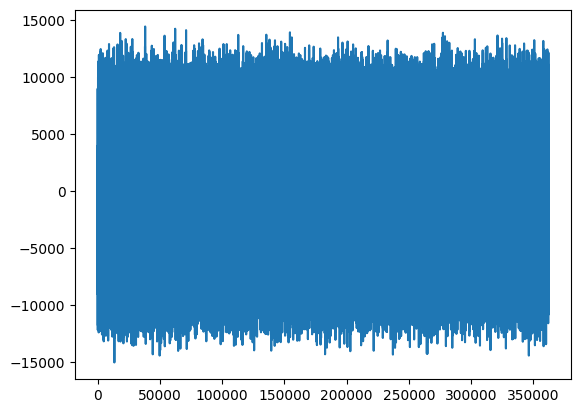

In [8]:
plt.plot(audio)